In [1]:
%matplotlib widget

from functools import partial

import numpy as np
from scipy import optimize
from matplotlib import colors, cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from pygifsicle import optimize as opt_gif

from comp_inhib_wc import dxdt_v2, jacobian, sim_dev, plot_sim_dev

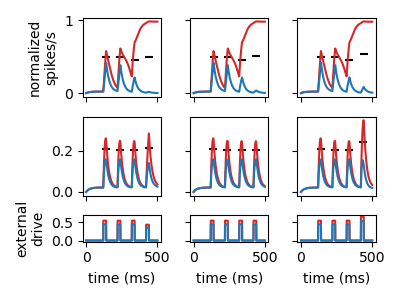

In [2]:
# for final figures!!!!

dev = 0.2  # change in proportion of original injected excitation

w_ii, w_ij, w_ii_l2, w_ij_l2, w_fb = [1., -0.33840608, 0.2270948, -0.2, -1.]

tau = 20
tau_2 = 20
thresh = 0.5
thresh_2 = 0.5
steepness = 8
steepness_2 = 15

# setup figure
gridspec = {'width_ratios': [1, 1, 1], 'height_ratios': [3, 3, 1]}
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                         gridspec_kw=gridspec, figsize=(4, 3))

# -DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=-dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2,)
x_negdev_noL6 = x.copy()
plot_sim_dev(times, x[:, :2], axes[0, 0])  # only plot first subgroup

# 0 DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=0.0,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[0, 1])  # only plot first subgroup

# +DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[0, 2])  # only plot first subgroup

# -DEV; with L6
times, x, inj_excite, _ = sim_dev(dev=-dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
x_negdev_L6 = x.copy()  # save for later
inj_excite_negdev = inj_excite.copy()  # save for later
plot_sim_dev(times, x[:, :2], axes[1, 0])  # now plot both subgroups
# plot time course for injected excitation
colors = ['tab:red', 'tab:blue']
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 0].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

# 0 DEV; with L6
times, x, inj_excite, w = sim_dev(dev=0.0,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
x_nodev_L6 = x.copy()  # save for later
inj_excite_nodev = inj_excite.copy()  # save for later
plot_sim_dev(times, x[:, :2], axes[1, 1])  # now plot both subgroups
# plot time course for injected excitation
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 1].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

# +DEV; with L6
times, x, inj_excite, w = sim_dev(dev=dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
x_posdev_L6 = x.copy()  # save for later
inj_excite_posdev = inj_excite.copy()  # save for later
plot_sim_dev(times, x[:, :2], axes[1, 2])  # now plot both subgroups
# plot time course for injected excitation
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 2].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

axes[0, 0].set_ylabel('normalized\nspikes/s')
axes[2, 0].set_ylabel('external\ndrive')
axes[2, 0].set_xlabel('time (ms)')
axes[2, 1].set_xlabel('time (ms)')
axes[2, 2].set_xlabel('time (ms)')
fig.tight_layout()
plt.show()

In [3]:
# fig.savefig('simple_model_example_detailed.pdf')

In [4]:
# inhib = -1 * (x @ (w * (np.ones_like(w) - np.eye(w.shape[0]))))

# inhib_red = inhib[:, 0]
# inhib_blue = inhib[:, 0]

# colors = ['tab:red', 'tab:blue']
# fig, axes = plt.subplots(1, 2, figsize=(6, 6))
# axes[0].plot(times, inhib[:, 0], color=colors[0])
# axes[0].plot(times, inhib[:, 1], color=colors[1])
# axes[1].plot(inhib[:, 1], inhib[:, 0])
# plt.show()

In [5]:
# for collection of coordinates of stable fixed points
attractors = np.zeros((3, 2))

In [6]:
# find fixed points
I = 0.01 * np.ones((4,))

def func_roots(x):
    x = np.array(x)  # convert to array if not one already
    return (dxdt_v2(x, w, inj_excite=I, thresh=thresh, thresh_2=thresh_2,
                    steepness=steepness, steepness_2=steepness_2),
            jacobian(x, w, inj_excite=I, tau=tau, tau_2=tau_2,
                     thresh=thresh, thresh_2=thresh_2,
                     steepness=steepness, steepness_2=steepness_2))

# plot Jacobian over mulitple values of x_0 -> look for roots visually
# domain = np.linspace(0, 1, 100)
# J_0 = list()
# for x_0 in domain:
#     J_0.append(func_roots(x_0))
# plt.figure()
# plt.plot(domain, J_0)

# find roots numerically
sol = optimize.root(func_roots, x0=[0.5, 0.5, 0.5, 0.5], method='hybr',
                    tol=1e-10, jac=True)
attractors[0, :] = sol.x[:2]
bottom_layer_fixed_points = sol.x[2:]
print(sol.x, sol.nfev, sol.message)

[0.02165743 0.02165743 0.00064235 0.00064235] 9 The solution converged.


In [7]:
# find fixed points
I = 0.01 * np.ones((4,))

def func_roots(x):
    x = np.array(x)  # convert to array if not one already
    return (dxdt_v2(x, w, inj_excite=I, thresh=thresh, thresh_2=thresh_2,
                    steepness=steepness, steepness_2=steepness_2),
            jacobian(x, w, inj_excite=I, tau=tau, tau_2=tau_2,
                     thresh=thresh, thresh_2=thresh_2,
                     steepness=steepness, steepness_2=steepness_2))

# plot Jacobian over mulitple values of x_0 -> look for roots visually
# domain = np.linspace(0, 1, 100)
# J_0 = list()
# for x_0 in domain:
#     J_0.append(func_roots(x_0))
# plt.figure()
# plt.plot(domain, J_0)

# find roots numerically
sol = optimize.root(func_roots, x0=[0.1, 0.9, 0.5, 0.5], method='hybr',
                    tol=1e-10, jac=True)
attractors[1, :] = sol.x[:2]
attractors[2, :] = sol.x[1::-1]
print(sol.x, sol.nfev, sol.message)

[1.40232651e-03 9.80441585e-01 6.42347265e-04 6.42347265e-04] 11 The solution converged.


In [8]:
# # sanity check: make sure state remains constant at the estimated fixed point
# dt = 0.01  # ms
# tstop = 300  # ms
# times = np.arange(0, tstop + dt, dt)
# x = np.zeros((len(times), 4))

# # set initial state
# x[0, :] = sol.x
# # x[0, :] = [0.12165743, 0.72165743, 0.00064235, 0.00064235]

# for t_idx, time in enumerate(times):
#     if t_idx > 0:
#         dx = dxdt_v2(x[t_idx - 1, :], w, inj_excite=I,
#                      thresh=thresh, thresh_2=thresh_2,
#                      steepness=steepness, steepness_2=steepness_2) * dt
#         x[t_idx, :] = x[t_idx - 1, :] + dx

# # plot trajetory - it should flatline indicating the state is at a fixed point
# fig, axes = plt.subplots(1, 1, sharex=True)
# axes.plot(times, x, alpha=0.8)
# axes.set_ylim([0, 1])
# axes.set_xlabel('time (ms)')
# plt.show()

In [9]:
# nullclines
# inverse of activation function
def sigmoid_inverse(x, thresh, steepness):
    return -1 / steepness * np.log(1 / x - 1) + thresh

# find set of injected excitation vals in first half of sim
# to avoid dev
inj_excite_vals = np.unique(inj_excite[:len(times) // 2, :])
inj_excite_baseline, inj_excite_np, inj_excite_p = inj_excite_vals
x_domain = np.linspace(1e-9, 1 - 1e-9, 10000)
x_3_fixed = np.full_like(x_domain, bottom_layer_fixed_points[0])
x_4_fixed = np.full_like(x_domain, bottom_layer_fixed_points[1])

# plot as x_1 variable (y-axis)
x_234 = np.stack([x_domain, x_3_fixed, x_4_fixed])
x2_nullcline = 1 / w[0, 1] * (sigmoid_inverse(x_domain, thresh, steepness) - w[[1,2,3], 1] @ x_234 - inj_excite_baseline)
# x2_nullcline = 1 / w[0, 1] * (sigmoid_inverse(x_domain, thresh, steepness) - w[[1,2,3], 1] @ x_234 - inj_excite_np * 1.0)
x2_null_mask = np.logical_and(x2_nullcline >= 0, x2_nullcline <= 1)

# plot as x_2 variable (x-axis)
x_134 = np.stack([x_domain, x_3_fixed, x_4_fixed])
x1_nullcline = 1 / w[1, 0] * (sigmoid_inverse(x_domain, thresh, steepness) - w[[0,2,3], 0] @ x_134 - inj_excite_baseline)
# x1_nullcline = 1 / w[1, 0] * (sigmoid_inverse(x_domain, thresh, steepness) - w[[0,2,3], 0] @ x_134 - inj_excite_p * 1.0)
x1_null_mask = np.logical_and(x1_nullcline >= 0, x1_nullcline <= 1)

In [10]:
# find intersection points of nullclines: these are the analytic fixed points (stable and unstable)
def func_roots(vars):
    x1, x2 = vars

    # x2 nullcline
    x_234 = np.array([[x2], [bottom_layer_fixed_points[0]], [bottom_layer_fixed_points[1]]])
    eq1 = -x1 + 1 / w[0, 1] * (sigmoid_inverse(x2, thresh, steepness) - w[[1,2,3], 1] @ x_234 - inj_excite_baseline)

    # x1 nullcline
    x_134 = np.array([[x1], [bottom_layer_fixed_points[0]], [bottom_layer_fixed_points[1]]])
    eq2 = -x2 + 1 / w[1, 0] * (sigmoid_inverse(x1, thresh, steepness) - w[[0,2,3], 0] @ x_134 - inj_excite_baseline)
    return [eq1[0], eq2[0]]

# find roots numerically
start_pts = [[0.001, 0.99],
             [0.01, 0.50],
             [0.01, 0.01],
             [0.50, 0.01],
             [0.99, 0.001]]
# mask for stable fixed pts assuming convergence near start pts
stable_mask = np.array([True, False, True, False, True])
fixed_pts = np.zeros_like(start_pts)
for idx, start_pt in enumerate(start_pts):
    sol = optimize.root(func_roots, x0=start_pt, method='hybr', tol=1e-10)
    fixed_pts[idx] = sol.x
    print(sol.x, sol.nfev, sol.message)

[0.00140233 0.98044159] 12 The solution converged.
[0.00551889 0.48501545] 11 The solution converged.
[0.02165743 0.02165743] 12 The solution converged.
[0.48501545 0.00551889] 11 The solution converged.
[0.98044159 0.00140233] 12 The solution converged.


In [11]:
# plt.figure()
# plt.plot(x_domain, x2_nullcline)
# plt.plot(x1_nullcline, x_domain)

# plt.figure()
# plt.scatter(x_domain[x2_null_mask], x2_nullcline[x2_null_mask])
# plt.scatter(x1_nullcline[x1_null_mask], x_domain[x1_null_mask])

/tmp/ipykernel_48159/3382749114.py:22: RuntimeWarning: invalid value encountered in divide
  M = Y / (Y + X)
/tmp/ipykernel_48159/3382749114.py:69: RuntimeWarning: invalid value encountered in divide
  M = Y / (Y + X)
/tmp/ipykernel_48159/3382749114.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


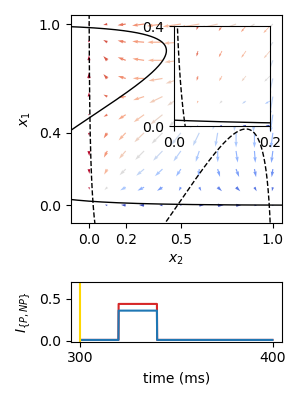

In [28]:
# first, specfify inputs and simulate state trajectories we're plotting
inj_excite_dev = inj_excite_negdev.copy()
x_simulated = x_negdev_L6.copy()
fname_label = '_negdev'

# full phase diagram (with lower->upper units connected)
n_X = 11
n_Y = 11
X_pos = np.linspace(0, 1, n_X)
Y_pos = np.linspace(0, 1, n_Y)
X, Y = np.meshgrid(X_pos, Y_pos)

U = np.zeros((n_X, n_Y))
V = np.zeros((n_X, n_Y))
for x1_idx, x1 in enumerate(X_pos):
    for x0_idx, x0 in enumerate(Y_pos):
        x = np.array([x0, x1, bottom_layer_fixed_points[0], bottom_layer_fixed_points[1]])
        velocity = dxdt_v2(x, w, inj_excite=I)
        # velocity = dxdt_v2(x, w, inj_excite=I_perturb)
        U[x0_idx, x1_idx] = velocity[1]
        V[x0_idx, x1_idx] = velocity[0]
M = Y / (Y + X)

# setup figure
gridspec = {'width_ratios': [1], 'height_ratios': [3.5, 1]}
fig, axes = plt.subplots(2, 1, gridspec_kw=gridspec, figsize=(3, 4))

# plot vector field
q = axes[0].quiver(X, Y, U, V, M, cmap='coolwarm')
# ax.scatter(fixed_pts[stable_mask, 0],
#            fixed_pts[stable_mask, 1],
#            marker='o', c='k')
# ax.scatter(fixed_pts[stable_mask == False, 0],
#            fixed_pts[stable_mask == False, 1],
#            marker='o', fc='none', ec='k')
axes[0].set_xticks([0, 0.2, 0.5, 1])
axes[0].set_yticks([0, 0.4, 1])

# plot nullclines
xlim = axes[0].get_xlim()
ylim = axes[0].get_ylim()
ln_0, = axes[0].plot(x1_nullcline, x_domain, c='k', lw=1)  # x_2 when dx_1/dt = 0
ln_1, = axes[0].plot(x_domain, x2_nullcline, c='k', lw=1, ls='--')  # x_1 when dx_2/dt = 0
axes[0].set_xlim([-0.1, xlim[1]])
axes[0].set_ylim([-0.1, ylim[1]])

# plot system solution
t_mask = np.logical_and(times >= 400, times < 500)  # after burn-in, before final evoked input
ln_2, = axes[0].plot(x_simulated[t_mask, 1][0], x_simulated[t_mask, 0][0], c='gold', lw=1)
axes[0].set_ylabel(r'$x_1$')
axes[0].set_xlabel(r'$x_2$')

#### plot inset showing blow-up of axes[0]
axes_inset = fig.add_axes([.58, .685, .32, .25])
axes_inset.set(xlim=(0, 0.2), ylim=(0, 0.4), xticks=(0, 0.2), yticks=(0, 0.4))

X_pos = np.linspace(0, 0.2, 5)
Y_pos = np.linspace(0, 0.4, 5)
X, Y = np.meshgrid(X_pos, Y_pos)
U = np.zeros((5, 5))
V = np.zeros((5, 5))
for x1_idx, x1 in enumerate(X_pos):
    for x0_idx, x0 in enumerate(Y_pos):
        x = np.array([x0, x1, bottom_layer_fixed_points[0], bottom_layer_fixed_points[1]])
        velocity = dxdt_v2(x, w, inj_excite=I)
        # velocity = dxdt_v2(x, w, inj_excite=I_perturb)
        U[x0_idx, x1_idx] = velocity[1]
        V[x0_idx, x1_idx] = velocity[0]
M = Y / (Y + X)
q_inset = axes_inset.quiver(X, Y, U, V, M, cmap='coolwarm')
ln_0_inset, = axes_inset.plot(x1_nullcline, x_domain, c='k', lw=1)  # x_2 when dx_1/dt = 0
ln_1_inset, = axes_inset.plot(x_domain, x2_nullcline, c='k', lw=1, ls='--')  # x_1 when dx_2/dt = 0
ln_2_inset, = axes_inset.plot(x_simulated[t_mask, 1][0], x_simulated[t_mask, 0][0], c='gold', lw=1)
####

# plot input
times_adjusted = times - 100
for unit_idx in range(inj_excite_dev.shape[1] // 2):
    inj_excite_traj = inj_excite_dev[:, unit_idx]
    axes[1].plot(times_adjusted[t_mask], inj_excite_traj[t_mask], color=colors[unit_idx], alpha=1.0)
    axes[1].set_ylim((axes[1].get_ylim()[0], 0.7))
    axes[1].set_yticks((0, 0.5))
    axes[1].set_xticks((300, 400))
    axes[1].set_ylabel(r'$I_{\{P, NP\}}$')
    axes[1].set_xlabel('time (ms)')

# plot marker delinating current position in time
ln_3 = axes[1].axvline(times_adjusted[t_mask][0], c='gold')

fig.tight_layout()

In [29]:
def get_arrow_vectors(w, x_2, x_3, inj_excite, X_pos, Y_pos):
    n_X, n_Y = len(X_pos), len(Y_pos)
    U = np.zeros((n_X, n_Y))
    V = np.zeros((n_X, n_Y))
    for x1_idx, x1 in enumerate(X_pos):
        for x0_idx, x0 in enumerate(Y_pos):
            x = np.array([x0, x1, x_2, x_3])
            velocity = dxdt_v2(x, w, inj_excite=inj_excite)
            U[x0_idx, x1_idx] = velocity[1]
            V[x0_idx, x1_idx] = velocity[0]
    return U, V

def get_nullclines(x_2, x_3, inj_excite):
    x1_span = x2_span = np.linspace(1e-9, 1 - 1e-9, 10000)  # get as close to spanning (0, 1) as possible
    x3_fixed = np.full_like(x_domain, x_2)
    x4_fixed = np.full_like(x_domain, x_3)
    x = np.stack([x1_span, x2_span, x3_fixed, x4_fixed])

    # plot as x_1 variable (y-axis)
    x2_nullcline = 1 / w[0, 1] * (sigmoid_inverse(x_domain, thresh, steepness) - w[[1,2,3], 1] @ x[[1,2,3], :] - inj_excite[1])

    # plot as x_2 variable (x-axis)
    x1_nullcline = 1 / w[1, 0] * (sigmoid_inverse(x_domain, thresh, steepness) - w[[0,2,3], 0] @ x[[0,2,3], :] - inj_excite[0])
    return ([x1_nullcline, x1_span], [x2_span, x2_nullcline])

def update(frame, init_frame):
    U, V = get_arrow_vectors(w=w,
                             x_2=x_simulated[frame, 2],
                             x_3=x_simulated[frame, 3],
                             inj_excite=inj_excite_dev[frame, :],
                             X_pos=np.linspace(0, 1, n_X), Y_pos=np.linspace(0, 1, n_Y))
    # now do the same for the inset
    U_inset, V_inset = get_arrow_vectors(w=w,
                                         x_2=x_simulated[frame, 2],
                                         x_3=x_simulated[frame, 3],
                                         inj_excite=inj_excite_dev[frame, :],
                                         X_pos=np.linspace(0, 0.2, 5),
                                         Y_pos=np.linspace(0, 0.4, 5))

    x1_nullcline, x2_nullcline = get_nullclines(x_2=x_simulated[frame, 2],
                                                x_3=x_simulated[frame, 3],
                                                inj_excite=inj_excite_dev[frame, :])
    # get state from all frames leading up to current frame
    x1_traj, x2_traj = x_simulated[init_frame:frame + 1, 0], x_simulated[init_frame:frame + 1, 1]

    q.set_UVC(U, V)
    ln_0.set_data(x1_nullcline[0], x1_nullcline[1])
    ln_1.set_data(x2_nullcline[0], x2_nullcline[1])
    ln_2.set_data(x2_traj, x1_traj)
    q_inset.set_UVC(U_inset, V_inset)
    ln_0_inset.set_data(x1_nullcline[0], x1_nullcline[1])
    ln_1_inset.set_data(x2_nullcline[0], x2_nullcline[1])
    ln_2_inset.set_data(x2_traj, x1_traj)
    ln_3.set_xdata([times_adjusted[frame], times_adjusted[frame]])

    return q, ln_0, ln_1, ln_2, q_inset, ln_0_inset, ln_1_inset, ln_2_inset, ln_3

In [30]:
frames = np.nonzero(t_mask)[0][0::2]  # decimate to reduce size of GIF
ani = animation.FuncAnimation(fig, partial(update, init_frame=frames[0]),
                              frames=frames, interval=33, repeat=False)
writer = animation.writers['pillow'](fps=10)
fname = 'phase_plane' + fname_label + '.gif'
ani.save(fname, writer=writer, dpi=300)

In [ ]:
# opt_gif(fname)

gifsicle: warning: huge GIF, conserving memory (processing may take a while)


/tmp/ipykernel_24634/2034909558.py:17: RuntimeWarning: invalid value encountered in divide
  M = Y / (Y + X)


(-0.1, 1.05)

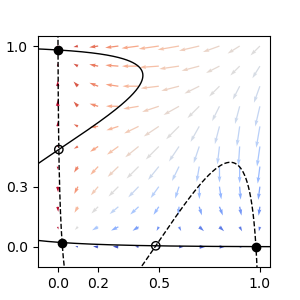

In [13]:
# full phase diagram (with lower->upper units connected)
n_X = 11
n_Y = 11
X_pos = np.linspace(0, 1, n_X)
Y_pos = np.linspace(0, 1, n_Y)
X, Y = np.meshgrid(X_pos, Y_pos)

U = np.zeros((n_X, n_Y))
V = np.zeros((n_X, n_Y))
for x1_idx, x1 in enumerate(X_pos):
    for x0_idx, x0 in enumerate(Y_pos):
        x = np.array([x0, x1, bottom_layer_fixed_points[0], bottom_layer_fixed_points[1]])
        velocity = dxdt_v2(x, w, inj_excite=I)
        # velocity = dxdt_v2(x, w, inj_excite=I_perturb)
        U[x0_idx, x1_idx] = velocity[1]
        V[x0_idx, x1_idx] = velocity[0]
M = Y / (Y + X)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
q = ax.quiver(X, Y, U, V, M, cmap='coolwarm')
ax.scatter(fixed_pts[stable_mask, 0],
           fixed_pts[stable_mask, 1],
           marker='o', c='k')
ax.scatter(fixed_pts[stable_mask == False, 0],
           fixed_pts[stable_mask == False, 1],
           marker='o', fc='none', ec='k')
ax.set_xticks([0, 0.2, 0.5, 1])
ax.set_yticks([0, 0.3, 1])

# plot nullclines
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.plot(x_domain, x2_nullcline, c='k', lw=1, ls='--')  # x_1 when dx_2/dt = 0
ax.plot(x1_nullcline, x_domain, c='k', lw=1)  # x_2 when dx_1/dt = 0
ax.set_xlim([-0.1, xlim[1]])
ax.set_ylim([-0.1, ylim[1]])

In [31]:
fig.savefig('full_phase_diagram.pdf')

In [14]:
# segment response into rise and decay time windows for distinctive plotting
# of trajectory in phase space
low_I = np.min(inj_excite)
decay_idxs = np.nonzero(inj_excite[:, 0] == low_I)[0]
new_win_idxs = np.nonzero(np.diff(decay_idxs) > 1)[0] + 1

decay_windows = list()
rise_windows = list()
start_idx = 1
# NB: for curve continuity, each window starts at the end-point of the prior
# window
for new_win_idx in new_win_idxs:
    # add each window that proceeds a period of injected excitation
    decay_begin = decay_idxs[start_idx]
    decay_end = decay_idxs[new_win_idx - 1] + 1
    decay_windows.append(np.arange(decay_begin - 1, decay_end))
    rise_begin = decay_idxs[new_win_idx - 1] + 1
    rise_end = decay_idxs[new_win_idx]
    rise_windows.append(np.arange(rise_begin - 1, rise_end))
    start_idx = new_win_idx
# add final window up until the end of simulation
decay_windows.append(decay_idxs[start_idx:-1])

/tmp/ipykernel_24634/1770418803.py:17: RuntimeWarning: invalid value encountered in divide
  M = Y / (Y + X)


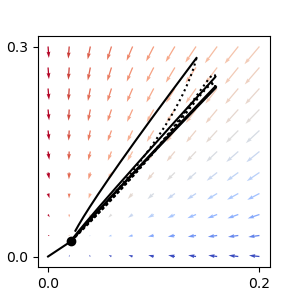

In [15]:
# snapshot phase diagram overlayed with simulated trajectory (with lower->upper
# units connected)
n_X = 11
n_Y = 11
X_pos = np.linspace(0, 0.2, n_X)
Y_pos = np.linspace(0, 0.3, n_Y)
X, Y = np.meshgrid(X_pos, Y_pos)

U = np.zeros((n_X, n_Y))
V = np.zeros((n_X, n_Y))
for x1_idx, x1 in enumerate(X_pos):
    for x0_idx, x0 in enumerate(Y_pos):
        x = np.array([x0, x1, bottom_layer_fixed_points[0], bottom_layer_fixed_points[1]])
        velocity = dxdt_v2(x, w, inj_excite=I)
        U[x0_idx, x1_idx] = velocity[1]
        V[x0_idx, x1_idx] = velocity[0]
M = Y / (Y + X)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
q = ax.quiver(X, Y, U, V, M, cmap='coolwarm')
# q = ax.quiver(X, Y, U, V)
# ax.streamplot(X, Y, U, V)
# ax.plot(x_negdev_L6[:, 1], x_negdev_L6[:, 0], 'k')
for decay_win in decay_windows:
    ax.plot(x_negdev_L6[decay_win, 1], x_negdev_L6[decay_win, 0], 'k-')
for rise_win in rise_windows:
    ax.plot(x_negdev_L6[rise_win, 1], x_negdev_L6[rise_win, 0], 'k:')
ax.scatter(fixed_pts[2, 0], fixed_pts[2, 1], marker='o', c='k')
ax.set_xticks([0, 0.2])
ax.set_yticks([0, 0.3])

In [18]:
fig.savefig('sim_connected_phase_diagram.pdf')

In [16]:
# now, do the same except when the lower is disconnected from upper layer

In [17]:
# for collection of coordinates of stable fixed points
attractors_discon = np.zeros((3, 2))

In [18]:
# find fixed points
I = 0.01 * np.ones((4,))

n_dim = 4
w_discon_L2 = w.copy()
w_discon_L2[n_dim // 2:, :n_dim // 2] = 0

def func_roots(x):
    x = np.array(x)  # convert to array if not one already
    return (dxdt_v2(x, w_discon_L2, inj_excite=I, thresh=thresh, thresh_2=thresh_2,
                    steepness=steepness, steepness_2=steepness_2),
            jacobian(x, w_discon_L2, inj_excite=I, tau=tau, tau_2=tau_2,
                     thresh=thresh, thresh_2=thresh_2,
                     steepness=steepness, steepness_2=steepness_2))

# plot Jacobian over mulitple values of x_0 -> look for roots visually
# domain = np.linspace(0, 1, 100)
# J_0 = list()
# for x_0 in domain:
#     J_0.append(func_roots(x_0))
# plt.figure()
# plt.plot(domain, J_0)

# find roots numerically
sol_discon = optimize.root(func_roots, x0=[0.5, 0.5, 0.5, 0.5], method='hybr',
                           tol=1e-10, jac=True)
attractors_discon[0, :] = sol_discon.x[:2]
bottom_layer_fixed_points = sol_discon.x[2:]
print(sol_discon.x, sol_discon.nfev, sol_discon.message)

[0.02178045 0.02178045 0.00064235 0.00064235] 12 The solution converged.


In [19]:
# find fixed points
I = 0.01 * np.ones((4,))

n_dim = 4
w_discon_L2 = w.copy()
w_discon_L2[n_dim // 2:, :n_dim // 2] = 0

def func_roots(x):
    x = np.array(x)  # convert to array if not one already
    return (dxdt_v2(x, w_discon_L2, inj_excite=I, thresh=thresh, thresh_2=thresh_2,
                    steepness=steepness, steepness_2=steepness_2),
            jacobian(x, w_discon_L2, inj_excite=I, tau=tau, tau_2=tau_2,
                     thresh=thresh, thresh_2=thresh_2,
                     steepness=steepness, steepness_2=steepness_2))

# plot Jacobian over mulitple values of x_0 -> look for roots visually
# domain = np.linspace(0, 1, 100)
# J_0 = list()
# for x_0 in domain:
#     J_0.append(func_roots(x_0))
# plt.figure()
# plt.plot(domain, J_0)

# find roots numerically
sol_discon = optimize.root(func_roots, x0=[0.1, 0.9, 0.5, 0.5], method='hybr',
                           tol=1e-10, jac=True)
attractors_discon[1, :] = sol_discon.x[:2]
attractors_discon[2, :] = sol_discon.x[1::-1]
print(sol_discon.x, sol_discon.nfev, sol_discon.message)

[1.40917789e-03 9.80557165e-01 6.42347265e-04 6.42347265e-04] 8 The solution converged.


In [20]:
# find intersection points of nullclines: these are the analytic fixed points (stable and unstable)
def func_roots(vars):
    x1, x2 = vars
    
    # x2 nullcline
    eq1 = -x1 + 1 / w[0, 1] * (sigmoid_inverse(x2, thresh, steepness) - w[1, 1] * x2 - inj_excite_baseline)
    
    # x1 nullcline
    eq2 = -x2 + 1 / w[1, 0] * (sigmoid_inverse(x1, thresh, steepness) - w[0, 0] * x1 - inj_excite_baseline)
    return [eq1, eq2]

# find roots numerically
start_pts = [[0.001, 0.99],
             [0.01, 0.50],
             [0.01, 0.01],
             [0.50, 0.01],
             [0.99, 0.001]]
# mask for stable fixed pts assuming convergence near start pts
stable_mask = np.array([True, False, True, False, True])
fixed_pts = np.zeros_like(start_pts)
for idx, start_pt in enumerate(start_pts):
    sol = optimize.root(func_roots, x0=start_pt, method='hybr', tol=1e-10)
    fixed_pts[idx] = sol.x
    print(sol.x, sol.nfev, sol.message)

[0.00140918 0.98055717] 12 The solution converged.
[0.00556808 0.48376283] 11 The solution converged.
[0.02178045 0.02178045] 10 The solution converged.
[0.48376283 0.00556808] 11 The solution converged.
[0.98055717 0.00140918] 12 The solution converged.


/tmp/ipykernel_7874/2137102958.py:16: RuntimeWarning: invalid value encountered in divide
  M = Y / (Y + X)


(-0.1, 1.05)

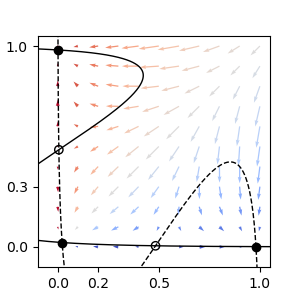

In [21]:
# full phase diagram (with lower->upper units disconnected)
n_X = 11
n_Y = 11
X_pos = np.linspace(0, 1, n_X)
Y_pos = np.linspace(0, 1, n_Y)
X, Y = np.meshgrid(X_pos, Y_pos)

U = np.zeros((n_X, n_Y))
V = np.zeros((n_X, n_Y))
for x1_idx, x1 in enumerate(X_pos):
    for x0_idx, x0 in enumerate(Y_pos):
        x = np.array([x0, x1, bottom_layer_fixed_points[0], bottom_layer_fixed_points[1]])
        velocity = dxdt_v2(x, w_discon_L2, inj_excite=I)
        U[x0_idx, x1_idx] = velocity[1]
        V[x0_idx, x1_idx] = velocity[0]
M = Y / (Y + X)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
q = ax.quiver(X, Y, U, V, M, cmap='coolwarm')
ax.scatter(fixed_pts[stable_mask, 0],
           fixed_pts[stable_mask, 1],
           marker='o', c='k')
ax.scatter(fixed_pts[stable_mask == False, 0],
           fixed_pts[stable_mask == False, 1],
           marker='o', fc='none', ec='k')
ax.set_xticks([0, 0.2, 0.5, 1])
ax.set_yticks([0, 0.3, 1])


# estimate nullclines and plot
# calculate as x_1 variable (y-axis)
x_234 = np.stack([x_domain, x_3_fixed, x_4_fixed])
x2_nullcline = 1 / w_discon_L2[0, 1] * (sigmoid_inverse(x_domain, thresh, steepness) - w_discon_L2[[1,2,3], 1] @ x_234 - inj_excite_baseline)
x2_null_mask = np.logical_and(x2_nullcline >= 0, x2_nullcline <= 1)

# calulate as x_2 variable (x-axis)
x_134 = np.stack([x_domain, x_3_fixed, x_4_fixed])
x1_nullcline = 1 / w_discon_L2[1, 0] * (sigmoid_inverse(x_domain, thresh, steepness) - w_discon_L2[[0,2,3], 0] @ x_134 - inj_excite_baseline)
x1_null_mask = np.logical_and(x1_nullcline >= 0, x1_nullcline <= 1)

# plot nullclines
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.plot(x_domain, x2_nullcline, c='k', lw=1, ls='--')  # x_1 when dx_2/dt = 0
ax.plot(x1_nullcline, x_domain, c='k', lw=1)  # x_2 when dx_1/dt = 0
ax.set_xlim([-0.1, xlim[1]])
ax.set_ylim([-0.1, ylim[1]])

In [40]:
fig.savefig('full_disconn_phase_diagram.pdf')

/tmp/ipykernel_7874/3551153702.py:17: RuntimeWarning: invalid value encountered in divide
  M = Y / (Y + X)


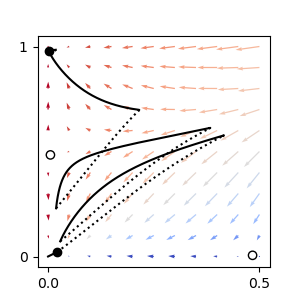

In [22]:
# snapshot phase diagram overlayed with simulated trajectory (with lower->upper
# units disconnected)
n_X = 11
n_Y = 11
X_pos = np.linspace(0, 0.5, n_X)
Y_pos = np.linspace(0, 1, n_Y)
X, Y = np.meshgrid(X_pos, Y_pos)

U = np.zeros((n_X, n_Y))
V = np.zeros((n_X, n_Y))
for x1_idx, x1 in enumerate(X_pos):
    for x0_idx, x0 in enumerate(Y_pos):
        x = np.array([x0, x1, bottom_layer_fixed_points[0], bottom_layer_fixed_points[1]])
        velocity = dxdt_v2(x, w_discon_L2, inj_excite=I)
        U[x0_idx, x1_idx] = velocity[1]
        V[x0_idx, x1_idx] = velocity[0]
M = Y / (Y + X)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
q = ax.quiver(X, Y, U, V, M, cmap='coolwarm')
# ax.streamplot(X, Y, U, V)
# ax.plot(x_negdev_noL6[:, 1], x_negdev_noL6[:, 0], 'k')
for decay_win in decay_windows:
    ax.plot(x_negdev_noL6[decay_win, 1], x_negdev_noL6[decay_win, 0], 'k-')
for rise_win in rise_windows:
    ax.plot(x_negdev_noL6[rise_win, 1], x_negdev_noL6[rise_win, 0], 'k:')
ax.scatter(fixed_pts[[0, 2], 0], fixed_pts[[0, 2], 1], marker='o', c='k')
ax.scatter(fixed_pts[[1, 3], 0], fixed_pts[[1, 3], 1], marker='o', fc='none', ec='k')
ax.set_xticks([0, 0.5])
ax.set_yticks([0, 1])

In [22]:
fig.savefig('sim_disconnected_phase_diagram.pdf')